# 获得数据

根据这些年的探索，对于获得数据的一些心得。

## 商业数据

这部分没有尝试，但可能会是最省事，质量最高的方式。

一般来说，数据都比较贵，个人使用者可能很难承担，但也有几个看起来好象还比较平价的。我记得的有：

- tushare：号称是免费的，但需要积分（通过捐款）。感觉价格不贵。
- 预测者网：通过邮件更新数据。好象价格不高，但数据类型有限。

## 平台数据

比如一些量化平台，可以提供一定程度的高质量数据。但缺点是数据一般不能下载，还有各种限制。每家还有不同的平台需要学习。
可能会有一两个好用的，但没有一家家去试了。也许可以再去试试。

## 免费数据

了解过的：
- baostock:一个小但够用的数据。缺点是感觉网站有段时间没有更新，担心持续性问题。
- qstock：一个比较新的平台。github的星数不多，感觉可能有些数据获取接口不太稳定。没有尝试。看起来在绘图方面下了比较多功夫。
- akshare: 免费数据的老大。数据种类很多，甚至可说是太多了。试了一部分，感觉大多数可能并不好用。比如，有下载的限制，或者其他问题。但维护者一直在更新。我试了一下，觉得东方财富的接口好象相对丰富而且稳定。

## 从akshare获得免费数据

- 免费的东西就意味着麻烦，花费时间和精力，从这个角度来说，天下没有免费的东西是对的。
- 下面的例子是为了获得A股的基本信息，但经历了多次尝试，最后得到最理想的结果是：
  - 东方财富网的包括“名称，代码，行业”
  - cninfo信息最全，但下了一半被限制了。2024年，我在ai的支持下终于实现了代理池下数据，最后终于实现了数据的获取。
  - 申万的行业很详细，但覆盖率较差。

## 股票基本数据获取
- 两个来源，一个是东方财富网，一个是cninfo.
- 获取工具放在mytools下面了。还需要一些修改。
- em的数据，数量最全，包括了已经退市的股票。但列数较少。只用他来做退市股票的分析。
- cninfo的数据，列数较多，去掉了已经退市的股票。可以做板块、主营业务，行业等分析。


In [42]:
import pandas as pd
import akshare as ak
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import numpy as np

In [304]:
# bash中使用fc-list 找到family name
# plt.rcdefaults() # 样式调乱了，需要用它重置一下。
font_path = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
fm.fontManager.addfont(font_path)
# 设置全局字体为
matplotlib.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.style.use('ggplot')

In [292]:
def showProfile(df) :
    col_profile = pd.concat([df.dtypes, df.isna().sum()/len(df)*100, df.sample().T], axis=1 ).reset_index()
    col_profile.columns = ['列名', '类型', '缺失比%','样例']
    
    return (col_profile)

In [293]:
df = pd.read_csv('em_data.csv')
tdf = df.pivot(index='symbol', columns='item', values='value')
dlisted_df = tdf[tdf['总股本'] == '-']
print(f'total: {len(tdf)} | dlisted: {len(dlisted_df)} | {len(dlisted_df)/len(tdf):.2%} | listed: {len(tdf)-len(dlisted_df)}')
showProfile(tdf)

total: 5622 | dlisted: 250 | 4.45% | listed: 5372


,列名,类型,缺失比%,样例
0,上市时间,object,0.0,20210824
1,总市值,object,0.0,8153485779.6
2,总股本,object,0.0,174967506.0
3,流通市值,object,0.0,6275214902.400001
4,流通股,object,0.0,134661264.0
5,股票代码,object,0.0,301050
6,股票简称,object,0.0,雷电微力
7,行业,object,0.0,半导体


In [294]:
# 总市值为‘-’的，应该是已经退市的
dlisted_df = tdf[tdf['总股本'] == '-'][['股票代码', '股票简称', '上市时间']].reset_index(drop=True)
dlisted_df.sort_values(by='上市时间', ascending=False)

item,股票代码,股票简称,上市时间
249,688555,退市泽达,20200623
248,688086,退市紫晶,20200226
244,603157,退市拉夏,20170925
243,603133,退市碳元,20170320
246,603603,退市博天,20170217
...,...,...,...
191,600607,上实医药,19920327
0,000003,PT金田A,19910703
200,600656,退市博元,19901219
199,600652,退市游久,19901219


In [295]:
def plot_barh(df):
    height = len(df)*25/72+0.5
    ax = df.plot.barh(figsize=(10, height), width=0.8, legend=False, zorder=3)
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.xaxis.tick_top()
    ax.xaxis.grid(True, color='#EEEEEE', zorder=0)
    ax.tick_params(left=False, bottom=False, top=False, right=False)
    ax.set_title(df.columns[0], fontsize=16, pad=20)
    
    plt.show(ax)

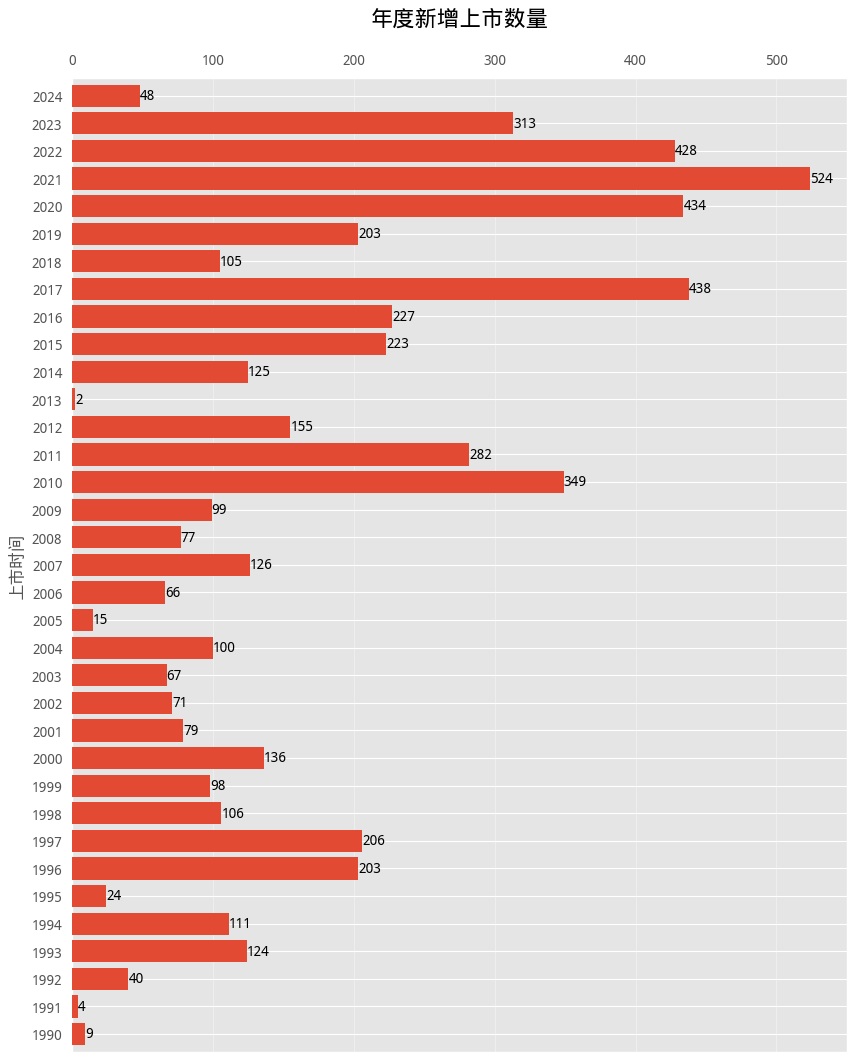

In [305]:
bydate = tdf.reset_index(drop=True).replace('-', np.nan)
byy=(bydate['上市时间'].dropna()
     .groupby(bydate['上市时间'].str[:4]).count()
     .to_frame(name='年度新增上市数量'))
plot_barh(byy)

疫情三年是上市公司数量剧增的三年。疫情后第一年增速也很可观。到了2024年，上半年已经过去了，增加的数量很少。

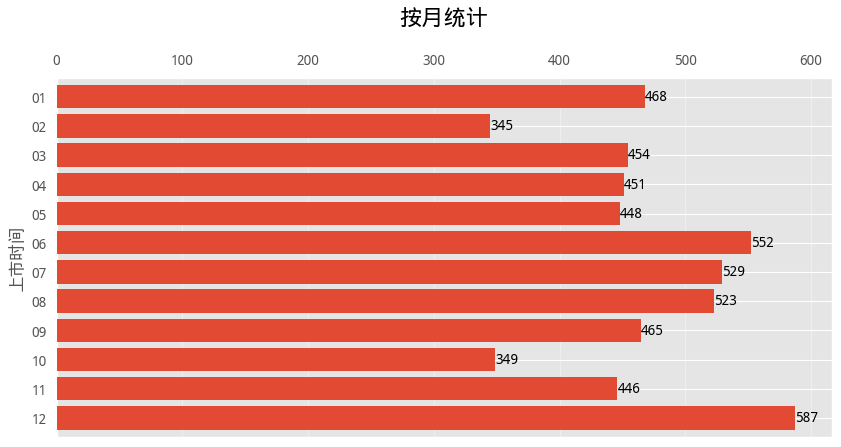

In [306]:
bym = bydate['上市时间'].groupby(bydate['上市时间'].str[4:6]).count().to_frame(name='按月统计').sort_index(ascending=False)
plot_barh(bym)

12月份、6月份和1月份的上市数量最多。

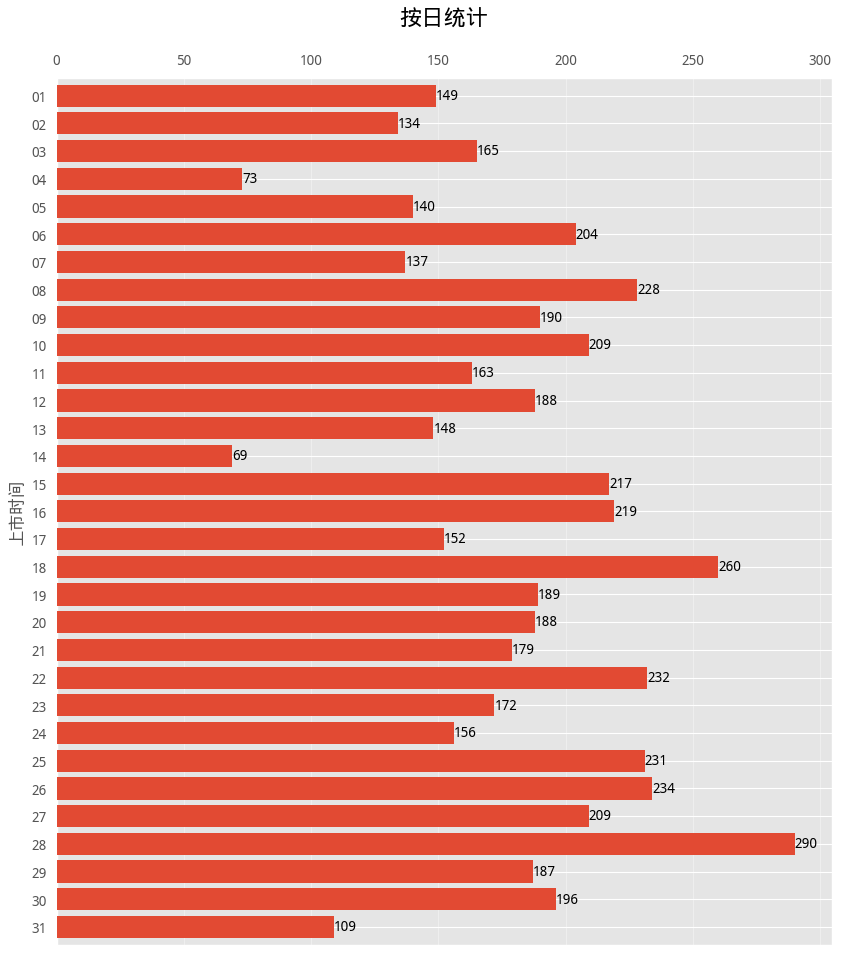

In [307]:
byd = bydate['上市时间'].groupby(bydate['上市时间'].str[6:]).count().to_frame(name='按日统计').sort_index(ascending=False)
plot_barh(byd)

没有猜错，28、18、8日上市的最多。14日、4日和24日显然很不受欢迎。

In [309]:
cninfo = pd.read_csv('cninfo_data.csv', dtype={'symbol': str})
cninfo.replace(np.nan, '', inplace=True)
cninfo['cname'] = cninfo['A股简称'] + cninfo['B股简称'] + cninfo['H股简称']
cninfo['cname'] = cninfo['cname'].str[:4]
# showProfile(cninfo)

In [310]:
sel = cninfo.loc[:,['symbol', 'cname', '所属市场', '所属行业', '成立日期', '上市日期', '联系电话','邮政编码','主营业务', '经营范围']]
sel.loc[:,'edate'] = pd.to_datetime(sel['成立日期'], errors='coerce')
sel.loc[:,'ldate'] = pd.to_datetime(sel['上市日期'], errors='coerce')
sel.loc[:, 'y_diff'] = (sel['ldate'] - sel['edate']).dt.days / 365.25

cninfo可以分析的点
- 分市场的上市公司数量。
- 成立时期到上市日期的时间跨度。
- 分行业上市公司数量。
- 主营业务和经营范围包含某个关键词的公司数量。

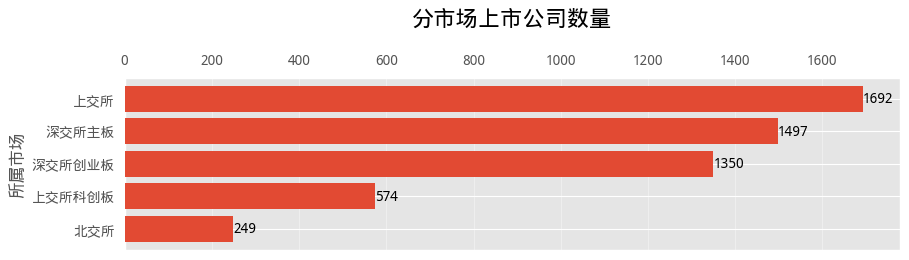

In [327]:
by_market = sel.groupby('所属市场')['symbol'].count().sort_values().to_frame('分市场上市公司数量')
plot_barh(by_market)

In [324]:
def plot_line(df, title=''):
    ax = df.plot.line(figsize=(10, 5), title=title)
    ax.tick_params(left=False, bottom=False)
    ax.yaxis.grid(True, color = '#EEEEEE')
    return plt.show(ax)

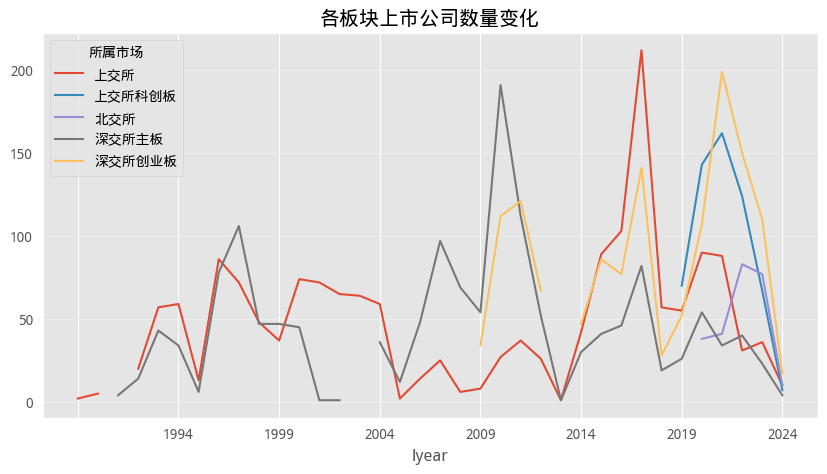

In [325]:
sel.loc[:,'lyear'] = sel['上市日期'].str[0:4]
sel_byy = sel.pivot_table(index='lyear', columns='所属市场', values='symbol', aggfunc='count')
plot_line(sel_byy, '各板块上市公司数量变化')
# sel_byy.plot.line(figsize=(10, 5)).tick_params(left=False, bottom=False)

深交所主析，上交所主板，深交所板和上交所科创板分别有个小高潮。北交所一直比较平淡。

In [316]:
sel = sel.dropna(subset=['上市日期', '成立日期'])
sel[sel['y_diff']<0][['symbol','cname','y_diff','成立日期','上市日期']].sort_values(by='上市日期', ascending=False).head(10)

,symbol,cname,y_diff,成立日期,上市日期
5101,600300,维维股份,-0.243669,2000-09-27,2000-06-30
517,600225,卓朗科技,-1.900068,2001-12-21,2000-01-27
4024,600782,新钢股份,-6.789870,2003-10-10,1996-12-25
3584,600778,友好集团,-0.632444,1997-07-22,1996-12-03
4008,600771,广誉远,-0.054757,1996-11-25,1996-11-05
5152,000596,古井贡酒,-2.433949,1999-03-05,1996-09-27
3383,600753,庚星股份,-0.038330,1996-10-11,1996-09-27
4018,000612,焦作万方,-0.169747,1996-11-27,1996-09-26
3232,600738,丽尚国潮,-0.334018,1996-12-02,1996-08-02
3015,600720,中交设计,-0.002738,1996-07-17,1996-07-16


居然有上市日期在成立日期之后的公司。估计有些历史原因，2000年之后就没有了。

In [317]:
sel[sel['y_diff']>0][['symbol','cname','y_diff','成立日期','上市日期']].sort_values(by='上市日期', ascending=0).describe()

,y_diff
count,5323.000000
mean,11.774865
std,7.470331
min,0.002738
25%,6.135524
50%,11.463381
75%,16.845996
max,61.056810


总体来说公司从成立到上市中位数为11.5年左右。实际上现在可能时间更长上点，因为在早期，很多公司是在上市前很短时间成立的新公司。现在这种情况已经很少见了。

In [334]:
top_indu = sel['所属行业'].groupby(sel['所属行业']).count().sort_values(ascending=1).tail(40)
tail_indu = sel['所属行业'].groupby(sel['所属行业']).count().sort_values(ascending=0).tail(40)

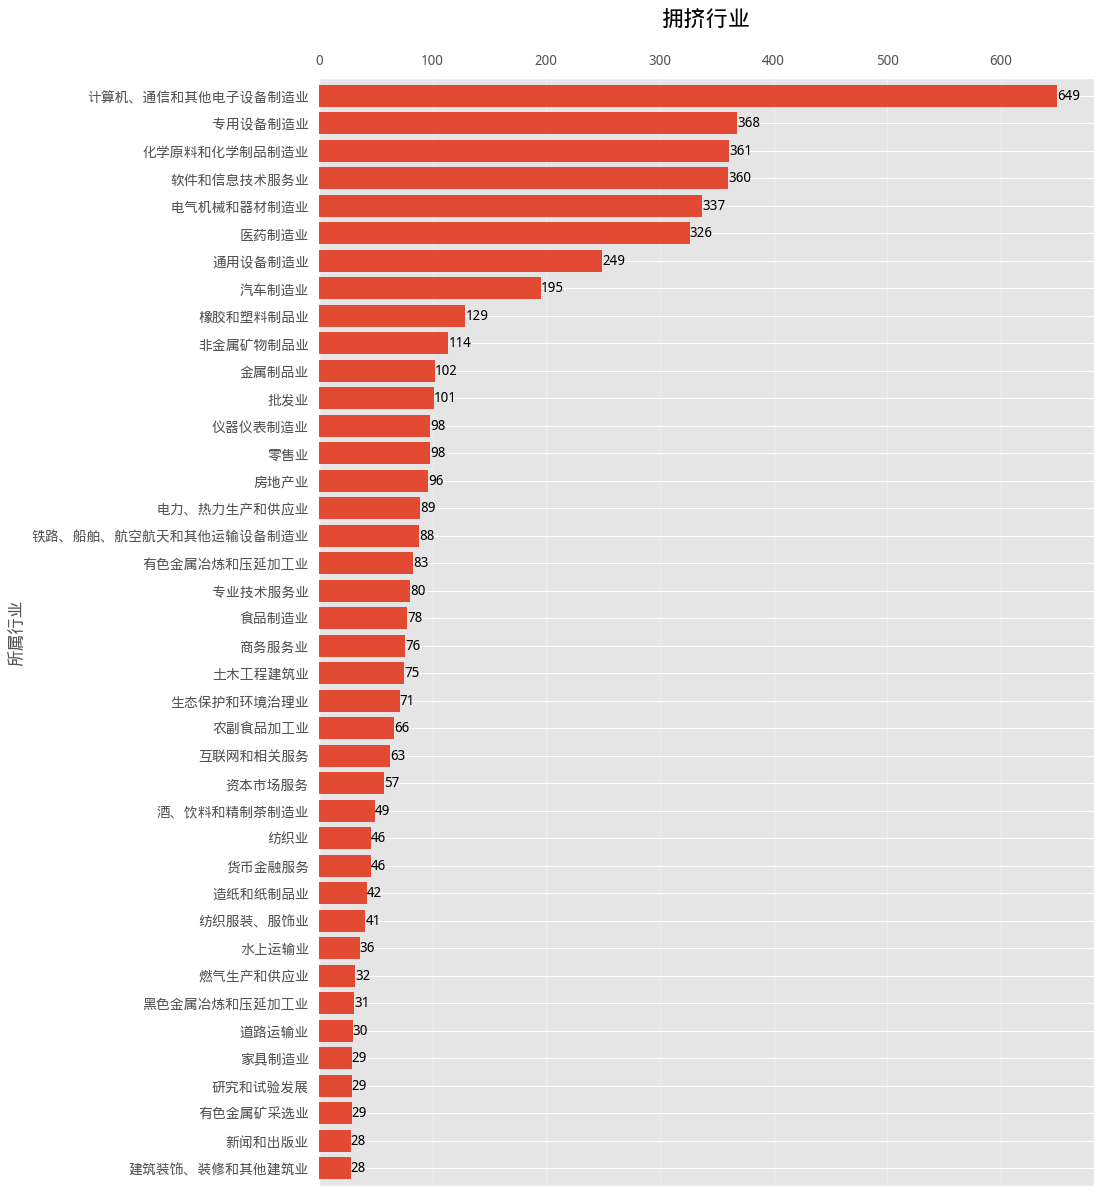

In [335]:
plot_barh(top_indu.to_frame(name='拥挤行业'))

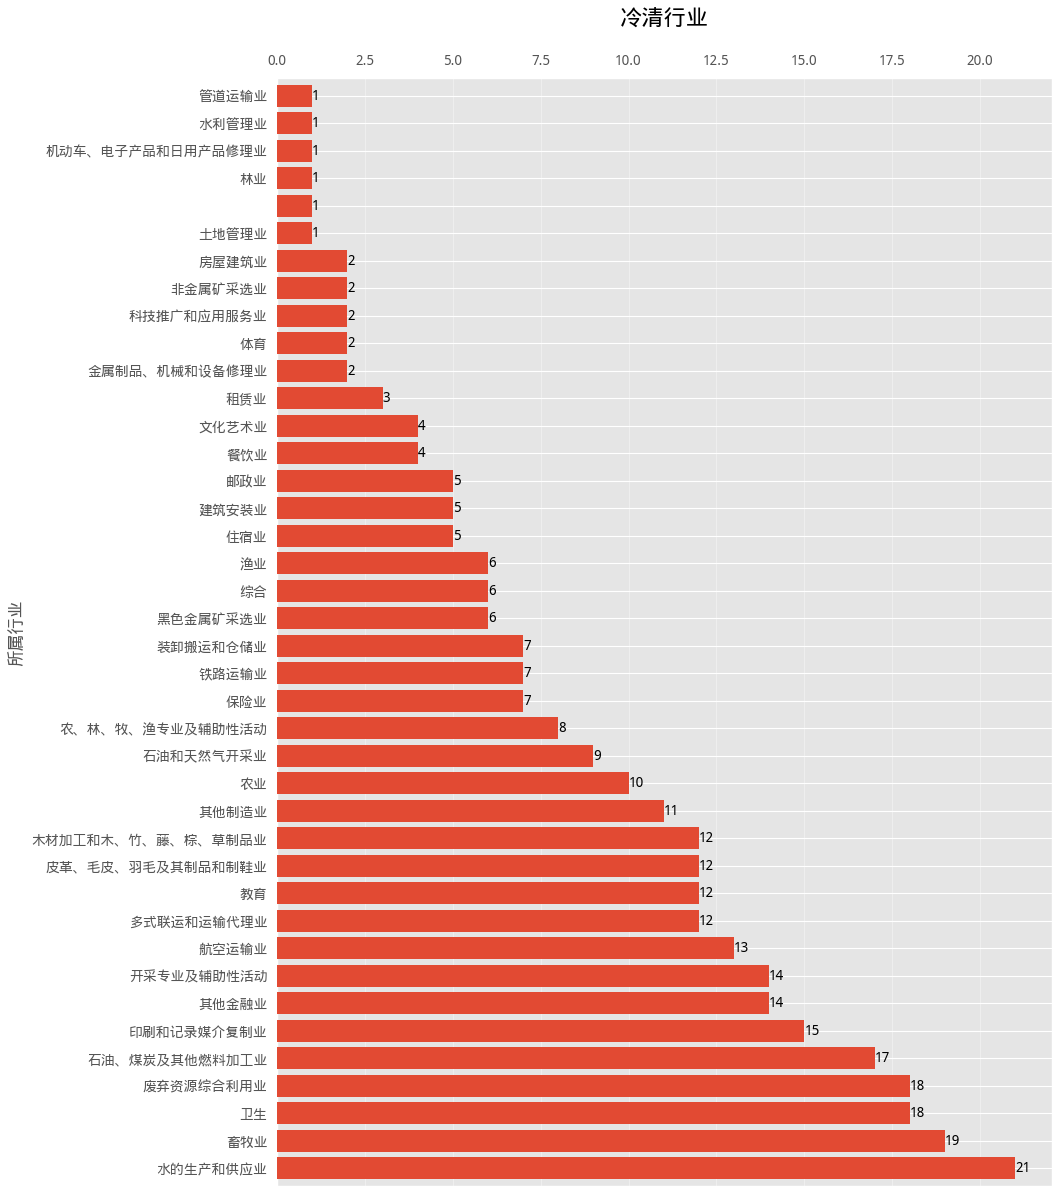

In [336]:
plot_barh(tail_indu.to_frame('冷清行业'))

cninfo里总共有86个行业。